# SLU10 - Metrics for regression: Learning Notebook

In this notebook, you will learn about:
    - Loss functions vs. Evaluation Metrics
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Coefficient of Determination (R²)
    - Adjusted R²
    - Scikitlearn metrics
    - Using metrics

In SLU07, you were introduced to one of the most intuitive and used regression models. You were also introduced to function ($J$) that measured how good the linear regression model was. In this SLU, we will take a look at that function, and others, more in-depth. 

## 1 - Loss functions vs. Evaluation Metrics

Before we dig into the metrics, there is something we should make it clear first. It will be very usual, while studying & practising data science, that you will hear/read these two words: **loss** and **metric**. Both of them refer to functions that evaluate the **quality** of a model. Sometimes, people will use both as they are the same thing. But really important differences between them:
* **Loss** is the function that your model will minimize;
* **Metric** is the function that you really want to use to evaluate how good your model is.

Sometimes, the loss and metric functions are the same (example: linear regression). But other times, e.g. in classification, the metric will be really different from the loss. In this notebook,  **we will focus on metrics**.

## 2 - Metrics for Linear Regression

### 2.1 - Mean Absolute Error (MAE)

$$MAE = \frac{1}{N} \sum_{n=1}^N \left|y_n - \hat{y}_n\right|$$

where $N$ is the number of observations in your dataset, $y_n$ is the target and $\hat{y}_n$ is the prediction given the observation $x_n$.

In [1]:
mae = lambda y, y_hat: np.abs(y - y_hat).mean()

* The lower, the better.
* It is less sensible to outliers than MSE (the next metric).
* The output can be interpreted as the expected error measured in the same units as the target.
* It can be used as both a metric and a loss function. There are some important caveats to take into consideration when using MAE as a loss function: (a) the number of solutions, (b) large jumps in the values of the parameters and (c) not having a derivative when MAE is 0.

### 2.2 - Mean Squared Error (MSE)

In SLU07, we already explored this metric

$$MSE = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2$$

where $N$ is the number of observations in your dataset, $y_n$ is the target and $\hat{y}_n$ is the prediction given the observation $x_n$.

In [2]:
mse = lambda y, y_hat: ((y - y_hat)**2).mean()

* The lower, the better.
* MSE can be used as both a metric and a loss function (e.g. linear regression).
* It is sensible to outliers in its' original form.
* The units of the metric are not the same as the ones used in the target. For example, if you are predicting house prices, i.e. the output is \$, then the output would have units like \$².

### 2.3 - Root Mean Squared Error (RMSE)

$$RMSE = \sqrt{MSE}$$

In [3]:
rmse = lambda y, y_hat: np.sqrt(mse(y, y_hat))

* The lower, the better.
* Its' output can be interpreted as having the same units as the targets.
* MSE can be used as both a metric and a loss function. If fact, if we computed its partial derivative is $\frac{\partial RMSE}{\partial \hat{y}} = \frac{1}{2 \sqrt{MSE}} MSE$
* Similar to MSE, RMSE will also be sensitive to outliers.

### 2.4 - Coefficient of Determination (R²)

R² compares how better your regression model is when compared with a predictor that outputs just the mean of the targets

$$\bar{y} = \frac{1}{N} \sum_{n=1}^N y_n$$

$$R² = 1 - \frac{MSE(y, \hat{y})}{MSE(y, \bar{y})} 
= 1 - \frac{\frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2}{\frac{1}{N} \sum_{n=1}^N (y_n - \bar{y})^2}
= 1 - \frac{\sum_{n=1}^N (y_n - \hat{y}_n)^2}{\sum_{n=1}^N (y_n - \bar{y})^2}$$

where $N$ is the number of observations in your dataset, $y_n$ is the target and $\hat{y}_n$ is the prediction given the observation $x_n$.

In [4]:
r2 = lambda y, y_hat: 1 - (mse(y, y_hat) / mse(y, np.mean(y)))

The higher the R², the more sure you are that the independent variables you used explain how the dependent variable changes. For example, if you got a R² of 0.7, you can say that the set of features you used are able to explain 70% of the target variable..

The higher R² you can get is 1. If you get R² = 0, it means that your model doesn't explain anything in the target by using the features you selected. If you get R² < 0, you are probably suffering too much with overshooting. Also, another reason for having R² < 0 is that the model you used doesn't make sense for that data you have.

Also, when using R², there are something important [caveats](https://en.wikipedia.org/wiki/Coefficient_of_determination#Caveats) to take into account. One of the caveats is that, depending on the model, using more features can inflate the R² when, in fact, those features are really noisy, meaning the model is actually fitting to the noise.

### 2.5 - Adjusted R²

In order to take into account the addition of useless variables, we can use the adjusted R² score

$$R_{adj}^2 = 1 - \frac{N - 1}{N - K - 1} (1 - R^2)$$

where $N$ is the number of observations in the training dataset and K is the number of features your model is using.

In [5]:
adjusted_r2 = lambda y, y_hat, N, K: 1 - ((N - 1) / (N - K - 1)) * (1 - r2(y, y_hat))

## 3 - Using the metrics



As you learned in previous units, there are many ways of selecting your best estimator, and most of it relies on some way of measuring an in-sample-error (ISE) - computed on data used for training - and an out-of-sample error (OSE) - compute on data not used for training. 

### 3.1 - Hold out method

One of the methods you've seen were the hold-out method, where you can just split your data in a training set, where we will compoute the ISE, and a test set, where we will compute the OSE.

Let's start by seeing how to use this method with different metrics. First, let's load some data. 

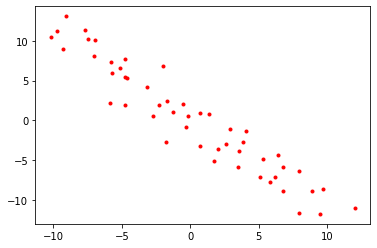

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/linear-learning.csv')
df = df.sort_values('x')

x = df['x'].values
y = df['y'].values

plt.plot(x, y, 'r.')

Now, remember the sklearn function to get your split for the hold-out method:

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
print("Number of observations:\nTrain: {} | Test: {}".format(x_train.shape[0], x_test.shape[0]))


Number of observations:
Train: 30 | Test: 20


We now want to train some classifiers and get estimates on both the training data and the test data:

In [8]:
from sklearn import linear_model

x_train_clf = x_train.reshape(-1, 1)
x_test_clf = x_test.reshape(-1, 1)

clf_1 = linear_model.LinearRegression()
clf_2 = linear_model.SGDRegressor()

clf_1.fit(x_train_clf, y_train)
clf_2.fit(x_train_clf, y_train)

y_hat_train_1 = clf_1.predict(x_train_clf)
y_hat_train_2 = clf_2.predict(x_train_clf)

y_hat_test_1 = clf_1.predict(x_test_clf)
y_hat_test_2 = clf_2.predict(x_test_clf)

Finally, we want to compare the metrics on both test sets. Let's see use one of our metrics results for these estimators:

In [9]:
print("Mean Absolute Error (MAE)")
print("LinearRegression estimator ISE with MAE: {}".format(mae(y_train, y_hat_train_1)))
print("SGDRegressor estimator ISE with MAE: {}".format(mae(y_train, y_hat_train_2)))
print("LinearRegression estimator OSE with MAE: {}".format(mae(y_test, y_hat_test_1)))
print("SGDRegressor estimator OSE with MAE: {}".format(mae(y_test, y_hat_test_2)))

Mean Absolute Error (MAE)
LinearRegression estimator ISE with MAE: 1.785580545485204
SGDRegressor estimator ISE with MAE: 1.8006038932953492
LinearRegression estimator OSE with MAE: 1.6664668327322623
SGDRegressor estimator OSE with MAE: 1.5520183262971372


So, using this metric, the SGDRegressor seems to perform better in unseen examples. Try out below for other metrics.

In [10]:
print("Mean Squared Error (MSE)")
print("LinearRegression estimator ISE with MSE: {}".format(mse(y_train, y_hat_train_1)))
print("SGDRegressor estimator ISE with MSE: {}".format(mse(y_train, y_hat_train_2)))
print("LinearRegression estimator OSE with MSE: {}".format(mse(y_test, y_hat_test_1)))
print("SGDRegressor estimator OSE with MSE: {}".format(mse(y_test, y_hat_test_2)))

print("\n========================\n")

print("Root Mean Squared Error (RMSE)")
print("LinearRegression estimator ISE with RMSE: {}".format(rmse(y_train, y_hat_train_1)))
print("SGDRegressor estimator ISE with RMSE: {}".format(rmse(y_train, y_hat_train_2)))
print("LinearRegression estimator OSE with RMSE: {}".format(rmse(y_test, y_hat_test_1)))
print("SGDRegressor estimator OSE with RMSE: {}".format(rmse(y_test, y_hat_test_2)))

print("\n========================\n")

print("R Squared (R2)")
print("LinearRegression estimator ISE with R2: {}".format(r2(y_train, y_hat_train_1)))
print("SGDRegressor estimator ISE with R2: {}".format(r2(y_train, y_hat_train_2)))
print("LinearRegression estimator OSE with R2: {}".format(r2(y_test, y_hat_test_1)))
print("SGDRegressor estimator OSE with R2: {}".format(r2(y_test, y_hat_test_2)))

Mean Squared Error (MSE)
LinearRegression estimator ISE with MSE: 4.552729667690825
SGDRegressor estimator ISE with MSE: 4.6182720629585585
LinearRegression estimator OSE with MSE: 4.17228029434453
SGDRegressor estimator OSE with MSE: 3.680779526800562


Root Mean Squared Error (RMSE)
LinearRegression estimator ISE with RMSE: 2.133712648809775
SGDRegressor estimator ISE with RMSE: 2.149016533896042
LinearRegression estimator OSE with RMSE: 2.0426160418308013
SGDRegressor estimator OSE with RMSE: 1.918535776784098


R Squared (R2)
LinearRegression estimator ISE with R2: 0.8788698193047504
SGDRegressor estimator ISE with R2: 0.8771259946629489
LinearRegression estimator OSE with R2: 0.9227062273372492
SGDRegressor estimator OSE with R2: 0.9318115476681018


Notice that to analyze it, you need to know if our metric should be minimized (like MSE) or maximized (like R2). If you want to normalize this to make sure your implementation is able to pick a model you can simply impose that your metric should be maximized, for example, and just reverse metrics that don't fit this definition.

For example, we can turn MSE into negative MSE and apply the same behavior to other metrics that aim to be minimized. That way, we could write:

In [11]:
mae_mod = lambda y, y_hat: -mae(y, y_hat)
mse_mod = lambda y, y_hat: -mse(y, y_hat)
rmse_mod = lambda y, y_hat: -rmse(y, y_hat)

metrics = {
    'Negative MAE': mae_mod,
    'Negative MSE': mse_mod,
    'Negative RMSE': rmse_mod,
    'R2': r2
}

clfs = {
    'LinearRegressor': clf_1,
    'SGDRegressor': clf_2
}


for key, clf in clfs.items():
    clf.fit(x_train_clf, y_train)

for metric, metric_f in metrics.items():
    
    best = None 
    best_model = None
    for key, clf in clfs.items():
        y_hat_train = clf.predict(x_train_clf)
        y_hat_test = clf.predict(x_test_clf)

        train_score = metric_f(y_train, y_hat_train)
        test_score = metric_f(y_test, y_hat_test)
        print("{} estimator ISE with {}: {}".format(key, metric, train_score))
        print("{} estimator OSE with {}: {}".format(key, metric, test_score))
        if not best or test_score > best:
            best = test_score
            best_model = key

    print("\nBest model with {}: {}".format(metric, best_model))
        
    print("\n========================\n")
    


LinearRegressor estimator ISE with Negative MAE: -1.785580545485204
LinearRegressor estimator OSE with Negative MAE: -1.6664668327322623
SGDRegressor estimator ISE with Negative MAE: -1.7674108869984027
SGDRegressor estimator OSE with Negative MAE: -1.7826813151943472

Best model with Negative MAE: LinearRegressor


LinearRegressor estimator ISE with Negative MSE: -4.552729667690825
LinearRegressor estimator OSE with Negative MSE: -4.17228029434453
SGDRegressor estimator ISE with Negative MSE: -4.606215315965559
SGDRegressor estimator OSE with Negative MSE: -4.614274402597188

Best model with Negative MSE: LinearRegressor


LinearRegressor estimator ISE with Negative RMSE: -2.133712648809775
LinearRegressor estimator OSE with Negative RMSE: -2.0426160418308013
SGDRegressor estimator ISE with Negative RMSE: -2.1462095228484936
SGDRegressor estimator OSE with Negative RMSE: -2.1480862186134866

Best model with Negative RMSE: LinearRegressor


LinearRegressor estimator ISE with R2: 0.8788

As you see, it is quite usefull for all metrics to have the same logic in terms of performance, this is, how you should interpret if the model is better or not. We will see the same for cross-validation now.

### 3.2 - K-fold cross validation

Another of the methods you've seen is cross validation by using a division in train/test data K times and assessing the scores that come out of it. Let's use the same example and classifiers as before:

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('data/linear-learning.csv')
df = df.sort_values('x')

x = df['x'].values
y = df['y'].values

x_clf = x.reshape(-1, 1)
y_clf = y.reshape(-1, 1)

clf_1 = linear_model.LinearRegression()
clf_2 = linear_model.SGDRegressor()

With scikitlearn, you can run the `cross_val_score` with k-fold and output the scores in each fold for both estimators:

In [13]:
from sklearn.model_selection import cross_val_score

clfs = {
    'LinearRegressor': clf_1,
    'SGDRegressor': clf_2
}

for key, clf in clfs.items():
    clf.fit(x_train_clf, y_train)

    
K = 5
for key, clf in clfs.items():
    scores = cross_val_score(clf, x_clf, y, cv=K)
    print('Estimator: {}'.format(key))
    print('Score avg. : {}'.format(scores.mean()))

Estimator: LinearRegressor
Score avg. : 0.21504998280872875
Estimator: SGDRegressor
Score avg. : 0.2201391287155796


But what is this score? If the scoring method is not specified, the estimator scorer is used. For both of our estimators, in this particular case, this corresponds to the coefficient of determination R^2 of the prediction. 

But what if we want to use another metric? Actually, the `cross_val_score` gives us the possibility of doing so, by passing a `scoring` parameter, which can be a string, for example. You can check [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) all of the possibilities, but for this SLU the most important one are:

* `neg_mean_absolute_error`	metrics.explained_variance_score	 
* `neg_mean_squared_error`	metrics.explained_variance_score	 
* `r2`	metrics.explained_variance_score

In this case, the metrics follow the rule of "higher is better", thus the negative MAE and MSE possibilities. 


In [14]:
from sklearn.model_selection import cross_val_score

clfs = {
    'LinearRegressor': clf_1,
    'SGDRegressor': clf_2
}

for key, clf in clfs.items():
    clf.fit(x_train_clf, y_train)

    
K = 5
for key, clf in clfs.items():
    scores = cross_val_score(clf, x_clf, y, cv=K, scoring="neg_mean_absolute_error")
    print('Estimator: {}'.format(key))
    print('Negative MAE avg. : {}'.format(scores.mean()))

Estimator: LinearRegressor
Negative MAE avg. : -1.7417523056701114
Estimator: SGDRegressor
Negative MAE avg. : -1.7396976447607582


There are also other ways of passing on metrics do these functions, and this is not the only function to perform these comparisons. You can explore the model selection to learn more about it. But for now, move forward to the exercises and the next SLUs.

![goodbye](assets/goodbye.gif)